In [2]:
# imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [ ]:
ruta = "/content/train.csv"
df = pd.read_csv(ruta)

In [ ]:
print(df.shape)
df.head()

(732, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


# 1. Limpieza del dataset de entrenamiento

En esta primera fase, procederemos a limpiar el dataset siguiendo las situaciones más comunes.

## 4.1 Datos faltantes

En primer lugar estudiaremos la existencia de registros incompletos en nuestro dataset.

In [ ]:
# Ver valores nulos en el DataFrame
valores_nulos = df.isnull().sum()

# Imprimir el número de valores nulos en cada columna
print(valores_nulos)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


Observamos que no hay registros vacíos en el dataset de entrenamiento, por lo que procedemos al siguiente paso.

En segundo lugar, estudiaremos el reparto de valores de cada variable buscando posibles anomalías.

Empezamos con la variable de la edad.

In [ ]:
# Obtener la distribución de valores de la variable "age" y ordenar por edad ascendente
reparto_age = df['age'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_age)


age
29.0     1
32.0     1
33.0     1
34.0     2
35.0     3
37.0     1
38.0     4
39.0     2
40.0     5
42.0     3
43.0     5
44.0     4
45.0     4
46.0     4
47.0     6
48.0     8
50.0     4
51.0     8
52.0     7
53.0     6
54.0    13
55.0    12
56.0     4
57.0     5
58.0     7
59.0     6
60.0     8
61.0     6
62.0     9
63.0     4
64.0     5
65.0     7
66.0     1
67.0     6
68.0     1
69.0     1
70.0     2
71.0     1
72.0     2
74.0     3
77.0     2
Name: count, dtype: int64


Como la edad es un número entero, nos podemos ahorrar sus decimales, por lo que pasamos la variable a formato entero.

In [ ]:
# Convertir los valores de la columna 'age' a enteros en el DataFrame df
df['age'] = df['age'].astype(int)

# Obtener la distribución de valores y ordenarla por edad ascendente
reparto_age = df['age'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_age)


age
29     1
32     1
33     1
34     2
35     3
37     1
38     4
39     2
40     5
42     3
43     5
44     4
45     4
46     4
47     6
48     8
50     4
51     8
52     7
53     6
54    13
55    12
56     4
57     5
58     7
59     6
60     8
61     6
62     9
63     4
64     5
65     7
66     1
67     6
68     1
69     1
70     2
71     1
72     2
74     3
77     2
Name: count, dtype: int64


Ahora procedemos a estudiar la variable del sexo.

In [ ]:
# Obtener la distribución de valores de la variable "sex" y ordenar por edad ascendente
reparto_sex = df['sex'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_sex)

sex
0.0     40
1.0    144
Name: count, dtype: int64


Vemos que el dataset otorga el valor 1 al sexo masculino, y 0 al femenino, por lo que podemos descartar los decimales también.

In [ ]:
# Convertir los valores de la columna 'sex' a enteros en el DataFrame df
df['sex'] = df['sex'].astype(int)

# Obtener la distribución de valores y ordenarla por sexo ascendente
reparto_sex = df['sex'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por sexo ascendente
print(reparto_sex)


sex
0     40
1    144
Name: count, dtype: int64


Procedemos a estudiar la variable cp, que otorga valores del 1 al 4 según el tipo de dolor del paciente.

In [ ]:
# Obtener la distribución de valores de la variable "cp" y ordenar por edad ascendente
reparto_cp = df['cp'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_cp)

cp
1.0      9
2.0     35
3.0     36
4.0    104
Name: count, dtype: int64


Descartamos los decimales de la misma manera.

In [ ]:
# Convertir los valores de la columna 'cp' a enteros en el DataFrame df
df['cp'] = df['cp'].astype(int)

# Obtener la distribución de valores y ordenarla por edad ascendente
reparto_cp = df['cp'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por cp ascendente
print(reparto_cp)


cp
1      9
2     35
3     36
4    104
Name: count, dtype: int64


Procedemos con la variable trestbps, que corresponde a la presión arterial en reposo.

In [ ]:
# Obtener la distribución de valores de la variable "trestbps" y ordenar por edad ascendente
reparto_trestbps = df['trestbps'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por edad ascendente
print(reparto_trestbps)

trestbps
-9.0      1
100.0     1
101.0     1
102       1
105       1
105.0     1
106       1
108.0     1
110       6
110.0     9
112.0     2
115       4
115.0     1
118.0     1
120       5
120.0    17
122       1
124       1
125       1
125.0     4
126       1
128.0     2
129.0     1
130       7
130.0    20
132.0     2
135.0     1
136.0     1
138       1
138.0     5
140       4
140.0    18
142       2
144       3
145       2
145.0     2
150       3
150.0    11
152       1
152.0     2
154       1
155       1
155.0     1
156       1
156.0     1
158       1
158.0     1
160       4
160.0     5
170       1
170.0     1
180.0     1
200       1
200.0     1
80        1
95        2
?        11
Name: count, dtype: int64


En primer lugar, al no existir ningún registro decimal, los descartamos.

In [ ]:
# Eliminar los decimales de la columna 'trestbps'
df['trestbps'] = df['trestbps'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores y ordenarla por trestbps ascendente
reparto_trestbps = df['trestbps'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por trestbps ascendente
print(reparto_trestbps)


trestbps
-9      1
100     1
101     1
102     1
105     2
106     1
108     1
110    15
112     2
115     5
118     1
120    22
122     1
124     1
125     5
126     1
128     2
129     1
130    27
132     2
135     1
136     1
138     6
140    22
142     2
144     3
145     4
150    14
152     3
154     1
155     2
156     2
158     2
160     9
170     2
180     1
200     2
80      1
95      2
?      11
Name: count, dtype: int64


Vemos que hay un outlier, ya que hay un registro con valor a 0, lo que no tiene sentido en nuestro dataset. Al solo ser uno, podemos proceder a descartarlo.

In [ ]:
# Eliminar los decimales de la columna 'trestbps'
df['trestbps'] = df['trestbps'].astype(str).str.split('.').str[0]

# Filtrar los valores diferentes de '0'
df = df[df['trestbps'] != '0']

# Obtener la distribución de valores y ordenarla por 'trestbps' ascendente
reparto_trestbps = df['trestbps'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por 'trestbps' ascendente
print(reparto_trestbps)


trestbps
-9      1
100     1
101     1
102     1
105     2
106     1
108     1
110    15
112     2
115     5
118     1
120    22
122     1
124     1
125     5
126     1
128     2
129     1
130    27
132     2
135     1
136     1
138     6
140    22
142     2
144     3
145     4
150    14
152     3
154     1
155     2
156     2
158     2
160     9
170     2
180     1
200     2
80      1
95      2
?      11
Name: count, dtype: int64


Vemos también que existen 47 valores desconocidos con valor '?'. Viendo la distribución de valores, vemos que la mayoría de los valores se encuentran entre 120 y 130. Vamos a calcular la media por si acaso.

In [ ]:
# Filtrar los valores diferentes de '?' en la columna 'trestbps'
df_filtered = df[df['trestbps'] != '?']

# Convertir la columna 'trestbps' a tipo entero
df_filtered['trestbps'] = df_filtered['trestbps'].astype(int)

# Calcular la media de los valores en la columna 'trestbps'
media_trestbps = df_filtered['trestbps'].mean()

# Imprimir la media
print("Media de trestbps", media_trestbps)


Media de trestbps 131.98843930635837


<ipython-input-59-76c34d7b955a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['trestbps'] = df_filtered['trestbps'].astype(int)


Al ser la media 130, que coincide con el rango de la moda, decidimos darle el valor 130 a los 47 registros desconocidos en esta fase inicial.

In [ ]:
# Reemplazar los valores '?' por 130 en la columna 'trestbps'
df['trestbps'].replace('?', 130, inplace=True)

# Convertir la columna 'trestbps' a tipo numérico
df['trestbps'] = pd.to_numeric(df['trestbps'])

# Obtener la distribución de valores y ordenarla por 'trestbps' ascendente
reparto_trestbps = df['trestbps'].value_counts().sort_index()

# Imprimir el reparto de valores ordenado por 'trestbps' ascendente
print(reparto_trestbps)


trestbps
-9       1
 80      1
 95      2
 100     1
 101     1
 102     1
 105     2
 106     1
 108     1
 110    15
 112     2
 115     5
 118     1
 120    22
 122     1
 124     1
 125     5
 126     1
 128     2
 129     1
 130    38
 132     2
 135     1
 136     1
 138     6
 140    22
 142     2
 144     3
 145     4
 150    14
 152     3
 154     1
 155     2
 156     2
 158     2
 160     9
 170     2
 180     1
 200     2
Name: count, dtype: int64


Ahora ya tendríamos bien normalizada esta variable.

A continuación procedemos a estudiar la variable *chol*, que corresponde con el colesterol sérico en sangre, del cual su disposición es la siguiente:

In [ ]:
# Obtener la distribución de valores de la variable 'chol'
distribucion_chol = df['chol'].value_counts().sort_index()

# Imprimir la distribución de valores de 'chol'
print(distribucion_chol)


chol
-9.0      7
0        36
149.0     1
156.0     1
160.0     1
         ..
392.0     1
393.0     1
394.0     2
407.0     1
?         2
Name: count, Length: 111, dtype: int64


De la misma manera, al no existir rango decimal lo convertimos a enteros. Tampoco encontramos ningún outlier.

In [ ]:
# Convertir los valores numéricos de la columna 'chol' a cadenas y eliminar los decimales
df['chol'] = df['chol'].astype(str).str.split('.').str[0]

# Imprimir la distribución de valores de 'chol'
distribucion_chol = df['chol'].value_counts(dropna=False).sort_index()
print(distribucion_chol)


chol
-9      7
0      36
149     1
156     1
160     1
       ..
392     1
393     1
394     2
407     1
?       2
Name: count, Length: 99, dtype: int64


Vemos ahora qué hacer con los 16 registros evaluados a -9, ya que no tiene sentido en la evaluación del colesterol.

In [ ]:
# Filtrar los valores diferentes de '?' y '-9' en la columna 'chol'
valid_chol = df[(df['chol'] != '?') & (df['chol'] != '-9')]['chol']

# Convertir los valores válidos a numéricos
valid_chol = pd.to_numeric(valid_chol)

# Calcular la media y la moda de los valores válidos
media_chol = valid_chol.mean()
moda_chol = valid_chol.mode()[0]

# Imprimir la media y la moda de 'chol'
print("Media de chol (sin incluir ? y -9):", media_chol)
print("Moda de chol (sin incluir ? y -9):", moda_chol)


Media de chol (sin incluir ? y -9): 195.85714285714286
Moda de chol (sin incluir ? y -9): 0


En este caso la media no es lo más óptimo, ya que lo común como vemos en la moda es no tener colesterol en sangre, por lo que sustituiremos los valores por la moda.

In [ ]:
# Reemplazar los valores '?' por 0 en la columna 'chol'
df['chol'].replace('?', 0, inplace=True)

# Reemplazar los valores '-9' por 0 en la columna 'chol'
df['chol'].replace('-9', 0, inplace=True)

# Convertir la columna 'chol' a tipo numérico
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

# Imprimir la distribución actualizada de valores de 'chol'
distribucion_chol = df['chol'].value_counts(dropna=False).sort_index()
print(distribucion_chol)


chol
0      45
149     1
156     1
160     1
164     1
       ..
369     1
392     1
393     1
394     2
407     1
Name: count, Length: 97, dtype: int64


Pasamos a la variable fbs, que evalúa a 1 si hay dolor por esfuerzo o 0 en caso contrario.

In [ ]:
# Obtener la distribución de valores de la variable 'fbs'
distribucion_fbs = df['fbs'].value_counts().sort_index()

# Imprimir la distribución de valores de 'fbs'
print(distribucion_fbs)


fbs
0       28
0.0    108
1       18
1.0      7
?       23
Name: count, dtype: int64


Lo pasamos a entero al no haber flotantes.

In [ ]:
# Eliminar los decimales de la columna 'fbs'
df['fbs'] = df['fbs'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores de la variable 'fbs'
distribucion_fbs = df['fbs'].value_counts().sort_index()

# Imprimir la distribución de valores de 'fbs'
print(distribucion_fbs)


fbs
0    136
1     25
?     23
Name: count, dtype: int64


Como vemos visualmente, la moda es bastante evidente, el 75% de los pacientes no experimentan dolor por esfuerzo, por lo que los valores anómalos (-9 e ?) los sustituiremos por esta moda, ya que suponemos que lo lógico y común es no sentir dolor, y no son pocos registros como para descartarlos.

In [ ]:
# Reemplazar los valores '-9' y '?' por '0' en la columna 'fbs'
df['fbs'].replace(['-9', '?'], '0', inplace=True)

# Convertir la columna 'fbs' a tipo entero
df['fbs'] = df['fbs'].astype(int)

# Obtener la distribución de valores de la variable 'fbs'
distribucion_fbs = df['fbs'].value_counts().sort_index()

# Imprimir la distribución de valores de 'fbs'
print(distribucion_fbs)


fbs
0    159
1     25
Name: count, dtype: int64


Continuamos con la variable restecg, la cual nos indica los resultados electrocardiográficos en reposo.

In [ ]:
# Obtener la distribución de valores de la variable 'restecg'
distribucion_restecg = df['restecg'].value_counts()

# Imprimir la distribución de valores de 'restecg'
print(distribucion_restecg)


restecg
0.0     77
0       33
2.0     29
1       25
2       10
1.0      8
-9.0     1
?        1
Name: count, dtype: int64


Vemos que la disposición de esta variable es correcta, simplemente la pasamos a entero como de costumbre.

In [ ]:
#PARA TRAIN

# Convertir la columna 'restecg' a tipo entero
df['restecg'] = df['restecg'].astype(int)

# Obtener la distribución de valores de la variable 'restecg'
distribucion_restecg = df['restecg'].value_counts().sort_index()

# Imprimir la distribución de valores de 'restecg'
print(distribucion_restecg)


restecg
0    438
1    145
2    148
Name: count, dtype: int64


In [ ]:
#PARA TEST
# Eliminar los decimales de la columna 'restecg'
df['restecg'] = df['restecg'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores de la variable 'restecg'
distribucion_restecg = df['restecg'].value_counts(dropna=False).sort_index()

# Imprimir la distribución de valores de 'restecg'
print(distribucion_restecg)


restecg
-9      1
0     110
1      33
2      39
?       1
Name: count, dtype: int64


Continuamos con thalach, que representa la frecuencia cardiaca en reposo.

In [ ]:
# Obtener la distribución de valores de la variable 'thalach' y ordenarla de menor a mayor
distribucion_thalach = df['thalach'].value_counts().sort_index()

# Imprimir la distribución de valores de 'thalach' ordenada de menor a mayor
print(distribucion_thalach)


thalach
-9.0      1
100.0     1
105       3
108       2
108.0     1
         ..
98        1
98.0      1
99        1
99.0      1
?        10
Name: count, Length: 106, dtype: int64


De manera habitual, al no haber decimales los descartamos.

In [ ]:
# Eliminar los decimales de la columna 'thalach'
df['thalach'] = df['thalach'].astype(str).str.split('.').str[0]

# Obtener la distribución de valores de la variable 'thalach' y ordenarla de menor a mayor
distribucion_thalach = df['thalach'].value_counts().sort_index()

# Imprimir la distribución de valores de 'thalach' ordenada de menor a mayor
print(distribucion_thalach)


thalach
-9      1
100     1
105     3
108     3
110     6
       ..
96      1
97      1
98      2
99      2
?      10
Name: count, Length: 83, dtype: int64


Aquí vemos que la distribución es bastante diversa, y tenemos que 44 registros no están asignados, por lo que debemos darles un valor.

Para ello, veremos a qué tienden los valores.

In [ ]:
import numpy as np

# Filtrar los valores diferentes de '?' en la columna 'thalach'
df_filtered = df[df['thalach'] != '?']

# Convertir la columna 'thalach' a tipo numérico
df_filtered['thalach'] = pd.to_numeric(df_filtered['thalach'])

# Calcular la media de los valores en la columna 'thalach'
media_thalach = df_filtered['thalach'].mean()

# Calcular la moda de los valores en la columna 'thalach'
moda_thalach = df_filtered['thalach'].mode()[0]

# Imprimir la media y la moda de 'thalach'
print("Media de thalach:", media_thalach)
print("Moda de thalach:", moda_thalach)


Media de thalach: 134.32183908045977
Moda de thalach: 130


<ipython-input-72-f0eece54ca33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['thalach'] = pd.to_numeric(df_filtered['thalach'])


Vemos que deja bastante evidente que tanto la media como la moda tienden a que lo más común en estas enfermedades es tener una frecuencia cardiaca en reposo entorno a 140, por lo que otorgaremos este valor a los registros desconocidos.

In [ ]:
# Reemplazar los valores '?' por '140' en la columna 'thalach'
df['thalach'].replace('?', '140', inplace=True)

# Mostrar la distribución de valores de la variable 'thalach'
distribucion_thalach = df['thalach'].value_counts().sort_index()
print(distribucion_thalach)


thalach
-9     1
100    1
105    3
108    3
110    6
      ..
94     1
96     1
97     1
98     2
99     2
Name: count, Length: 82, dtype: int64


Continuamos con exang, que representa con 1 si existe angina inducida por ejercicio, o 0 en caso contrario

In [ ]:
# Mostrar la distribución de valores de la variable 'exang'
distribucion_exang = df['exang'].value_counts()
print(distribucion_exang)


exang
0.0     79
1       35
1.0     35
0       24
?       10
-9.0     1
Name: count, dtype: int64


Lo primero como siempre, descartamos decimales al no haber flotantes.

Al haber una clara tendencia hacia una no presencia de angina, asignaremos 0 a los registros con ?.

In [ ]:
# Convertir la columna 'exang' a tipo entero
df['exang'] = df['exang'].replace('?', np.nan).astype(float).fillna(0).astype(int)

# Obtener la distribución de valores de la variable 'exang' y ordenarla de menor a mayor
distribucion_exang = df['exang'].value_counts().sort_index()

# Imprimir la distribución de valores de 'exang' ordenada de menor a mayor
print(distribucion_exang)


exang
-9      1
 0    113
 1     70
Name: count, dtype: int64


Continuamos con oldpeak, que representa la depresión del ST inducida por el ejercicio en relación con el reposo.

In [ ]:
# Obtener la distribución de valores de la variable 'oldpeak' y ordenarla de menor a mayor
distribucion_oldpeak = df['oldpeak'].value_counts().sort_index()

# Imprimir la distribución de valores de 'oldpeak' ordenada de menor a mayor
print(distribucion_oldpeak)


oldpeak
-.1     1
-.7     1
.1      1
.2      1
.4      1
.5      1
.7      2
0      18
0.0    54
0.1     1
0.2     3
0.4     1
0.5     1
0.6     3
0.8     4
1       4
1.0    14
1.1     1
1.2     6
1.3     1
1.4     3
1.5    13
1.6     2
1.8     2
1.9     1
2       8
2.0     8
2.4     1
2.5     3
2.8     2
3       3
3.0     2
3.6     2
4.0     2
?      13
Name: count, dtype: int64


Aquí vemos que sí hay decimales, por lo que no interesa descartarlos, y vemos que su distribución es más compleja, por lo que vamos a ver a qué tiende.

In [ ]:
# Filtrar los valores diferentes de '?' en la columna 'oldpeak'
valid_oldpeak = df[df['oldpeak'] != '?']['oldpeak']

# Convertir los valores válidos a numéricos
valid_oldpeak = pd.to_numeric(valid_oldpeak, errors='coerce')

# Calcular la media y la moda de los valores válidos
media_oldpeak = valid_oldpeak.mean()
moda_oldpeak = valid_oldpeak.mode()[0]

# Imprimir la media y la moda de 'oldpeak'
print("Media de oldpeak (sin incluir ?):", media_oldpeak)
print("Moda de oldpeak (sin incluir ?):", moda_oldpeak)


Media de oldpeak (sin incluir ?): 0.8543859649122807
Moda de oldpeak (sin incluir ?): 0.0


Vemos que existen valores negativos que no tienen por qué ser anómalos, por lo que de momento no los vamos a descartar. Vemos que tanto la media como la moda tienden a que el denominador más común suele ser 0, por lo que los 49 registros desconocidos los evaluaremos a 0.

In [ ]:

# Reemplazar los valores '?' por 0 en la columna 'oldpeak'
df['oldpeak'].replace('?', 0, inplace=True)

# Convertir los valores de la columna 'oldpeak' a tipo numérico, ignorando los valores no válidos ('?')
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')

# Imprimir la distribución actualizada de valores de 'oldpeak'
distribucion_oldpeak = df['oldpeak'].value_counts().sort_index()
print(distribucion_oldpeak)


oldpeak
-0.7     1
-0.1     1
 0.0    85
 0.1     2
 0.2     4
 0.4     2
 0.5     2
 0.6     3
 0.7     2
 0.8     4
 1.0    18
 1.1     1
 1.2     6
 1.3     1
 1.4     3
 1.5    13
 1.6     2
 1.8     2
 1.9     1
 2.0    16
 2.4     1
 2.5     3
 2.8     2
 3.0     5
 3.6     2
 4.0     2
Name: count, dtype: int64


Continuamos con slope, que representa la pendiente del segmento ST en ejercicio máximo, que solo puede tomar los valores 1, 2 y 3 (pendiente ascendente, plano y descendente respectivamente)

In [ ]:
# Mostrar la distribución de valores de la variable 'slope'
distribucion_slope = df['slope'].value_counts().sort_index()
print(distribucion_slope)


slope
-9.0    37
1       11
1.0     33
2       23
2.0     44
3       11
3.0      1
?       24
Name: count, dtype: int64


Aquí sí que lo primero es eliminar los decimales al no haber flotantes.

In [ ]:
# Convertir la columna 'slope' a tipo string y eliminar decimales
df['slope'] = df['slope'].astype(str).str.split('.').str[0]

# Mostrar la distribución de valores de la variable 'slope'
distribucion_slope = df['slope'].value_counts().sort_index()
print(distribucion_slope)


slope
-9    37
1     44
2     67
3     12
?     24
Name: count, dtype: int64


Aquí al no conocer el alcance exacto de la variable ni la importancia, y al haber una gran cantidad de registros desconocidos que no podemos descartar al ser muy elevado, procedemos a cambiarlos por la moda, que parece a priori que tiene una tendencia plana.

In [ ]:
# Reemplazar los valores '?' por 1 en la columna 'slope'
df['slope'].replace('?', '1', inplace=True)

# Reemplazar los valores -9 por 1 en la columna 'slope'
df['slope'].replace('-9', '1', inplace=True)

# Convertir la columna 'slope' a tipo entero
df['slope'] = df['slope'].astype(int)

# Mostrar la distribución actualizada de valores de la variable 'slope'
distribucion_slope = df['slope'].value_counts().sort_index()
print(distribucion_slope)


slope
1    105
2     67
3     12
Name: count, dtype: int64


Pasamos a la variable ca, que corresponde con el número de vasos mayores (0-3) coloreados por flouroscopia.

In [ ]:
# Mostrar la distribución de valores de la variable 'ca'
distribucion_ca = df['ca'].value_counts().sort_index()
print(distribucion_ca)


ca
-9.0    59
0.0     33
1        1
1.0     12
2        1
2.0      5
3.0      3
9.0      1
?       69
Name: count, dtype: int64


En primer lugar, como siempre, descartamos decimales al no existir flotantes.

In [ ]:
# Descartar los decimales en la distribución de valores de la variable 'ca'
df['ca'] = df['ca'].astype(str).str.split('.').str[0]

# Mostrar la distribución actualizada de valores de la variable 'ca'
distribucion_ca = df['ca'].value_counts().sort_index()
print(distribucion_ca)


ca
-9    59
0     33
1     13
2      6
3      3
9      1
?     69
Name: count, dtype: int64


Vemos que a priori no va a resultar una variable muy directa en el aprendizaje de la enfermedad, ya que hay más valores desconocidos que conocidos, por lo que simplemente los sustituiremos por la moda, que es el 0.

In [ ]:
# Reemplazar los valores '?' por '0' en la columna 'ca'
df['ca'].replace('?', '0', inplace=True)

# Reemplazar los valores '-9' por '0' en la columna 'ca'
df['ca'].replace('-9', '0', inplace=True)

# Mostrar la distribución actualizada de valores de la variable 'ca'
distribucion_ca = df['ca'].value_counts().sort_index()
print(distribucion_ca)


ca
0    161
1     13
2      6
3      3
9      1
Name: count, dtype: int64


Para finalizar la limpieza, analizaremos la variable thal, que representa con los valores 3, 6 y 7 los valores normal, defecto fijo y defecto reversible respectivamente.

In [ ]:
# Mostrar la distribución de valores de la variable 'thal'
distribucion_thal = df['thal'].value_counts().sort_index()
print(distribucion_thal)


thal
-9.0    55
3        3
3.0     36
6        4
6.0      5
7       14
7.0     18
?       49
Name: count, dtype: int64


Descartamos decimales de la manera habitual.

In [ ]:
# Descartar los decimales en la distribución de valores de la variable 'thal'
df['thal'] = df['thal'].astype(str).str.split('.').str[0]

# Mostrar la distribución actualizada de valores de la variable 'thal'
distribucion_thal = df['thal'].value_counts().sort_index()
print(distribucion_thal)


thal
-9    55
3     39
6      9
7     32
?     49
Name: count, dtype: int64


Aquí, de manera similar a la varible ca estudiada previamente, al existir multitud de registros desconocidos y no sacar una tendencia clara, decidimos otorgar a los desconocidos un thal normal, de cara a alterar el algoritmo lo menos posible.

In [ ]:
# Reemplazar los valores '?' por '3' en la columna 'thal'
df['thal'].replace('?', '3', inplace=True)

# Reemplazar los valores '-9' por '3' en la columna 'thal'
df['thal'].replace('-9', '3', inplace=True)

# Mostrar la distribución actualizada de valores de la variable 'thal'
distribucion_thal = df['thal'].value_counts().sort_index()
print(distribucion_thal)


thal
3    143
6      9
7     32
Name: count, dtype: int64


Con esto daríamos por finalizada la primera limpieza del dataset de entrenamiento, por lo que podemos proceder a descargarlo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    int64  
 1   sex       184 non-null    int64  
 2   cp        184 non-null    int64  
 3   trestbps  184 non-null    int64  
 4   chol      184 non-null    int64  
 5   fbs       184 non-null    int64  
 6   restecg   184 non-null    object 
 7   thalach   184 non-null    object 
 8   exang     184 non-null    int64  
 9   oldpeak   184 non-null    float64
 10  slope     184 non-null    int64  
 11  ca        184 non-null    object 
 12  thal      184 non-null    object 
dtypes: float64(1), int64(8), object(4)
memory usage: 18.8+ KB


In [ ]:
from google.colab import files

# Guardar el DataFrame modificado como un nuevo archivo CSV
df.to_csv('train_cleaned.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('train_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Una vez limpio el dataset de train, realizamos la limpieza sobre el dataset de test, y vemos los resultados.

In [ ]:
ruta = "/content/test.csv"
df = pd.read_csv(ruta)

In [ ]:
from google.colab import files

# Guardar el DataFrame modificado como un nuevo archivo CSV
df.to_csv('test_cleaned.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('test_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Observamos que algunos campos no se han limpiado correctamente debido a la diferencia de valores con el dataset de test, por el que añadimos manualmente las mismas lógicas que para el dataset de train.

# 2. Primera aproximación

En esta primera aproximación, vamos a generar un primer modelo de prueba kNN sobre el dataset de train y aplicarlo sobre el de test, generando un primer csv estimando las enfermedades de cada uno de los pacientes.

In [60]:
ruta = "/content/train_cleaned.csv"
df_train = pd.read_csv(ruta, sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '/content/train_cleaned.csv'

In [5]:
ruta = "/content/test_cleaned.csv"
# Lee el archivo CSV especificando el separador como punto y coma
df_test = pd.read_csv(ruta, sep=';')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       731 non-null    int64  
 1   sex       731 non-null    int64  
 2   cp        731 non-null    int64  
 3   trestbps  731 non-null    int64  
 4   chol      731 non-null    int64  
 5   fbs       731 non-null    int64  
 6   restecg   731 non-null    int64  
 7   thalach   731 non-null    int64  
 8   exang     731 non-null    int64  
 9   oldpeak   731 non-null    float64
 10  slope     731 non-null    int64  
 11  ca        731 non-null    int64  
 12  thal      731 non-null    int64  
 13  label     731 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 80.1 KB


In [6]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125,213,0,2,125,1,1.4,1,1,3,0
1,54,1,3,120,237,0,0,150,1,1.5,1,0,7,2
2,63,1,4,140,0,0,2,149,0,2.0,1,0,3,2
3,52,0,2,140,0,0,0,140,0,0.0,1,0,3,0
4,55,1,4,140,217,0,0,111,1,5.6,3,0,7,3


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    int64  
 1   sex       184 non-null    int64  
 2   cp        184 non-null    int64  
 3   trestbps  184 non-null    int64  
 4   chol      184 non-null    int64  
 5   fbs       184 non-null    int64  
 6   restecg   184 non-null    int64  
 7   thalach   184 non-null    int64  
 8   exang     184 non-null    int64  
 9   oldpeak   184 non-null    float64
 10  slope     184 non-null    int64  
 11  ca        184 non-null    int64  
 12  thal      184 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 18.8 KB


In [7]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,156,173,0,2,119,1,3.0,3,0,3
1,52,1,2,160,196,0,0,165,0,0.0,1,0,3
2,48,1,2,100,0,0,0,100,0,0.0,1,0,3
3,62,1,4,115,0,0,0,128,1,2.5,3,0,3
4,51,1,3,110,175,0,0,123,0,0.6,1,0,3


En esta primera aproximación ya con el dataset limpio, aplicaremos un modelo básico de regresión logística.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']
X_test = df_test  # No eliminamos la columna 'ID' del conjunto de datos de prueba

# Inicializar el modelo de Regresión Logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(X_test)

# Crear una columna de ID secuencial para identificar cada registro en el dataset de prueba
df_test['ID'] = range(len(df_test))

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': df_test['ID'], 'label': predictions})


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Descargamos el fichero a entregar y comprobamos la primera predicción.

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_2.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Esta primera predicción nos otorga un calidad 0.50543, lo que es una aproximación bastante decente en esta primer modelo, por lo que continuamos en la búsqueda de una mayor aproximación.

A continuación vamos a realizar un modelo con Random Forest, uno de los modelos más óptimos de predicción.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Bosques Aleatorios
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
predicted_labels_df.head()

,ID,label
0,0,2
1,1,0
2,2,0
3,3,1
4,4,0


In [ ]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125,213,0,2,125,1,1.4,1,1,3,0
1,54,1,3,120,237,0,0,150,1,1.5,1,0,7,2
2,63,1,4,140,0,0,2,149,0,2.0,1,0,3,2
3,52,0,2,140,0,0,0,140,0,0.0,1,0,3,0
4,55,1,4,140,217,0,0,111,1,5.6,3,0,7,3


In [ ]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,156,173,0,2,119,1,3.0,3,0,3
1,52,1,2,160,196,0,0,165,0,0.0,1,0,3
2,48,1,2,100,0,0,0,100,0,0.0,1,0,3
3,62,1,4,115,0,0,0,128,1,2.5,3,0,3
4,51,1,3,110,175,0,0,123,0,0.6,1,0,3


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_3.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tras esto obtenemos una aproximación de 0.58695, lo que supone una mejora notable de la predicción.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo KNN
model = KNeighborsClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_9.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_9.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_excel('prediccion_9.xlsx', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_9.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Árbol de Decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_10.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de árbol de decisión como estimador base
base_estimator = DecisionTreeClassifier()

# Inicializar el ensemble Bagging con árboles de decisión como estimadores base
model = BaggingClassifier(base_estimator=base_estimator)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_11.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_11.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_excel('prediccion_11.xlsx', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_11.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Gradient Boosting
model = GradientBoostingClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_12.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_12.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_excel('prediccion_12.xlsx', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_12.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Normalizacion

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Definir las columnas a normalizar
columns_to_normalize = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Crear un MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las características seleccionadas
df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Definir las columnas a normalizar
columns_to_normalize = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Crear un MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las características seleccionadas en el conjunto de entrenamiento
df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])

# Aplicar la misma transformación al conjunto de prueba
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])


In [12]:
# Mapear los valores de 'thal' a 1, 2 y 3
mapping = {3: 1, 6: 2, 7: 3}

# Reemplazar los valores en el conjunto de entrenamiento
df_train['thal'] = df_train['thal'].replace(mapping)

# Reemplazar los valores en el conjunto de prueba
df_test['thal'] = df_test['thal'].replace(mapping)


In [13]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,0.305556,0.353234,0,2,0.457746,1,0.454545,1,1,1,0
1,54,1,3,0.259259,0.393035,0,0,0.633803,1,0.465909,1,0,3,2
2,63,1,4,0.444444,0.000000,0,2,0.626761,0,0.522727,1,0,1,2
3,52,0,2,0.444444,0.000000,0,0,0.563380,0,0.295455,1,0,1,0
4,55,1,4,0.444444,0.359867,0,0,0.359155,1,0.931818,3,0,3,3


In [14]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,0.592593,0.286899,0,2,0.415493,1,0.636364,3,0,1
1,52,1,2,0.629630,0.325041,0,0,0.739437,0,0.295455,1,0,1
2,48,1,2,0.074074,0.000000,0,0,0.281690,0,0.295455,1,0,1
3,62,1,4,0.212963,0.000000,0,0,0.478873,1,0.579545,3,0,1
4,51,1,3,0.166667,0.290216,0,0,0.443662,0,0.363636,1,0,1


In [15]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
df_train.to_csv('train_normalized.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('train_normalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
df_test.to_csv('test_normalized.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('test_normalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. Modelos normalizados

In [69]:
ruta = "/content/train_normalized.csv"
# Lee el archivo CSV especificando el separador como punto y coma
df_train = pd.read_csv(ruta, sep=';')

In [70]:
ruta = "/content/test_normalized.csv"
# Lee el archivo CSV especificando el separador como punto y coma
df_test = pd.read_csv(ruta, sep=';')

In [9]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,0.305556,0.353234,0,2,0.457746,1,0.454545,1,1,1,0
1,54,1,3,0.259259,0.393035,0,0,0.633803,1,0.465909,1,0,3,2
2,63,1,4,0.444444,0.000000,0,2,0.626761,0,0.522727,1,0,1,2
3,52,0,2,0.444444,0.000000,0,0,0.563380,0,0.295455,1,0,1,0
4,55,1,4,0.444444,0.359867,0,0,0.359155,1,0.931818,3,0,3,3


In [10]:
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,0.592593,0.286899,0,2,0.415493,1,0.636364,3,0,1
1,52,1,2,0.629630,0.325041,0,0,0.739437,0,0.295455,1,0,1
2,48,1,2,0.074074,0.000000,0,0,0.281690,0,0.295455,1,0,1
3,62,1,4,0.212963,0.000000,0,0,0.478873,1,0.579545,3,0,1
4,51,1,3,0.166667,0.290216,0,0,0.443662,0,0.363636,1,0,1


In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en características (X) y etiquetas (y) para entrenamiento y prueba
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Bosques Aleatorios
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [12]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_13.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_13.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_excel('prediccion_13.xlsx', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_13.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en características (X) y etiquetas (y)
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Inicializar el modelo de Random Forest
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Definir un umbral de importancia
threshold = 0.03  # Por ejemplo, establecer el umbral en 0.05

# Seleccionar las características con una importancia mayor que el umbral
selected_features = X_train.columns[feature_importance > threshold]

# Crear un nuevo conjunto de datos de entrenamiento solo con las características seleccionadas
X_train_selected = X_train[selected_features]

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


Explicar variación del umbral, con 0.03 record de kaggle

In [24]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_14.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_14.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar el modelo Gradient Boosting
model = GradientBoostingClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = model.feature_importances_

# Definir un umbral de importancia
threshold = 0.05  # Por ejemplo, establecer el umbral en 0.05

# Seleccionar las características con una importancia mayor que el umbral
selected_features = X_train.columns[feature_importance > threshold]

# Crear un nuevo conjunto de datos de entrenamiento solo con las características seleccionadas
X_train_selected = X_train[selected_features]

# Realizar predicciones en el dataset de prueba
predictions = model.predict(df_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [41]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_16.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_16.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Dividir el conjunto de datos de entrenamiento en características (X_train) y etiquetas (y_train)
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# Dividir el conjunto de datos de prueba en características (X_test)
X_test = df_test

# Normalizar las características usando StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Inicializar el modelo SVM
model = SVC(kernel='rbf', C=0.1, random_state=42)

# Entrenar el modelo SVM con el conjunto de entrenamiento normalizado
model.fit(X_train_normalized, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_normalized)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(df_test)), 'label': predictions})


In [50]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_17.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_17.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5. SELECCIÓN DE CARACTERÍSTICAS

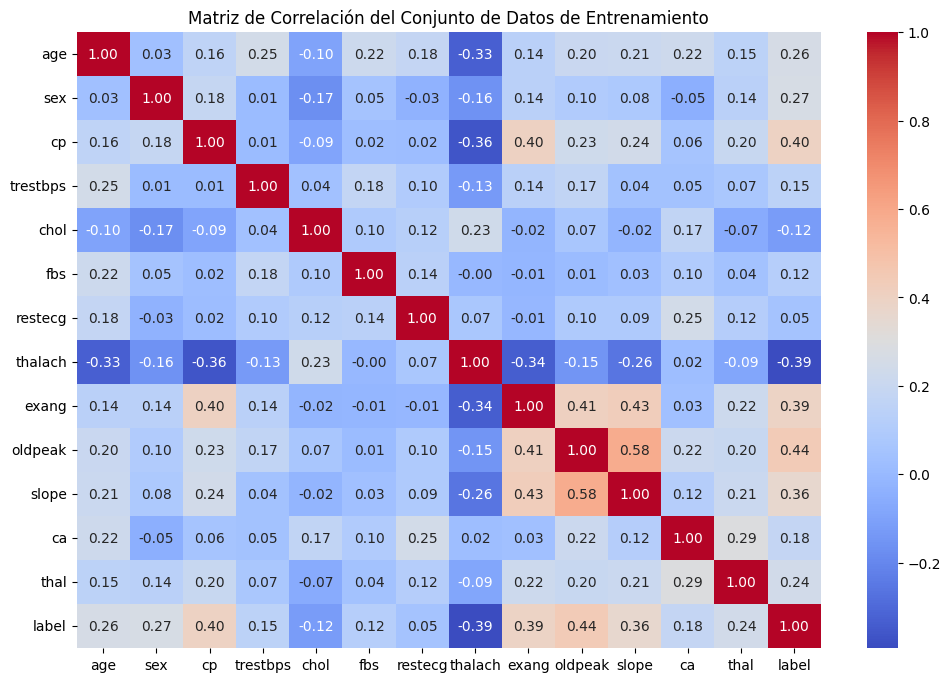

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_train.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación del Conjunto de Datos de Entrenamiento')
plt.show()


# 6. OPTIMIZACIÓN DE RANDOM FOREST

In [63]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir los hiperparámetros para la búsqueda aleatoria
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier()

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Ejecutar la búsqueda aleatoria para encontrar los mejores hiperparámetros
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = random_search.best_params_

# Crear un nuevo modelo con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(**best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model.fit(X_train, y_train)

# Realizar predicciones en el dataset de prueba
predictions = best_rf_model.predict(X_test)

# Crear un DataFrame con las columnas 'ID' y 'label' predichas
predicted_labels_df = pd.DataFrame({'ID': range(len(X_test)), 'label': predictions})


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [64]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
predicted_labels_df.to_csv('prediccion_18.csv', index=False)

# Descargar el archivo CSV a tu computadora local
files.download('prediccion_18.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No mejora


# 7. Creación de nuevas características

In [66]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,0.305556,0.353234,0,2,0.457746,1,0.454545,1,1,1,0
1,54,1,3,0.259259,0.393035,0,0,0.633803,1,0.465909,1,0,3,2
2,63,1,4,0.444444,0.000000,0,2,0.626761,0,0.522727,1,0,1,2
3,52,0,2,0.444444,0.000000,0,0,0.563380,0,0.295455,1,0,1,0
4,55,1,4,0.444444,0.359867,0,0,0.359155,1,0.931818,3,0,3,3


In [65]:
# Mostrar información del conjunto de datos de entrenamiento
print(df_train.info())

# Mostrar estadísticas descriptivas de las características numéricas
print(df_train.describe())

# Visualizar la distribución de la variable objetivo
print(df_train['label'].value_counts())

# Visualizar la correlación entre las características y la variable objetivo
print(df_train.corr()['label'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       731 non-null    int64  
 1   sex       731 non-null    int64  
 2   cp        731 non-null    int64  
 3   trestbps  731 non-null    float64
 4   chol      731 non-null    float64
 5   fbs       731 non-null    int64  
 6   restecg   731 non-null    int64  
 7   thalach   731 non-null    float64
 8   exang     731 non-null    int64  
 9   oldpeak   731 non-null    float64
 10  slope     731 non-null    int64  
 11  ca        731 non-null    int64  
 12  thal      731 non-null    int64  
 13  label     731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean    53.362517    0.789330    3.250342    0.37063